In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import import_ipynb
import sklearn
import tslearn
from concurrent.futures import ProcessPoolExecutor
import os
import pickle
import time
import re
from sklearn.metrics import silhouette_samples
from tslearn.metrics import cdist_soft_dtw_normalized, cdist_dtw
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

/home/kuba/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [3]:
np.set_printoptions(suppress=True, precision=5)

In [4]:
KatalogPickli="Pickle"
outDir="../src/OutDir"

In [20]:
with open(os.path.join(KatalogPickli, "Ecola-wygladzone-ustandaryzowane.pickle"), "rb") as plik:
    szeregi=pickle.load(plik)
with open(os.path.join(outDir, "odl-Ecola-wygladzone-ustandaryzowane.pickle1627736608.866078.pickle"), "rb") as plik:
    odl=pickle.load(plik)

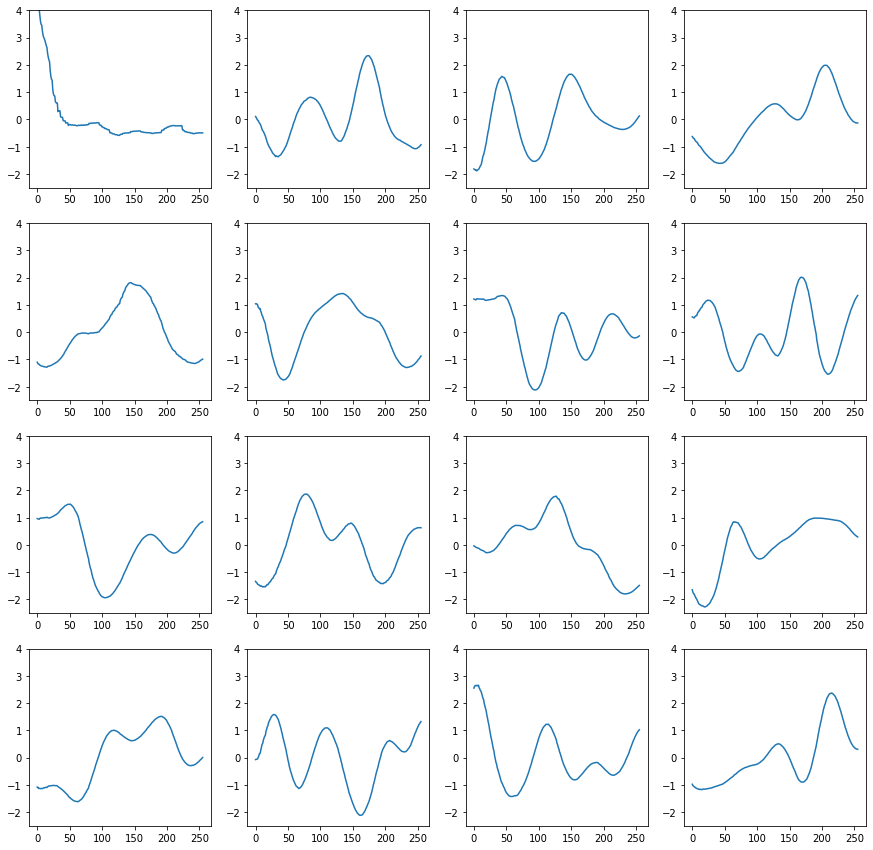

In [5]:
plt.gcf().set_size_inches(15,15)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.ylim(-2.5, 4)
    #plt.tick_params(axis='both',which='both', bottom=False,top=False, left=False, labelleft=False, labelbottom=False)
    plt.plot(szeregi[i,:])

# Softdtw

### Wykres silhouette

In [16]:
reExpr=re.compile(r"Ecola-wygladzone-ustandaryzowane.pickle-.*n_cluster-[0-9]+-dtw.pickle")
reExprOdl=re.compile(r".*odl.*")

In [17]:
listaPasujacych=[]
for plik in os.listdir("../src/OutDir"):
    if reExpr.match(plik) is not None and reExprOdl.match(plik) is None:
        listaPasujacych.append(plik)

In [18]:
listaPasujacych

['Ecola-wygladzone-ustandaryzowane.pickle-1627737931.066299-n_cluster-7-dtw.pickle',
 'Ecola-wygladzone-ustandaryzowane.pickle-1627737723.4056656-n_cluster-6-dtw.pickle',
 'Ecola-wygladzone-ustandaryzowane.pickle-1627737273.5788653-n_cluster-2-dtw.pickle',
 'Ecola-wygladzone-ustandaryzowane.pickle-1627737912.4617949-n_cluster-3-dtw.pickle',
 'Ecola-wygladzone-ustandaryzowane.pickle-1627737139.3435972-n_cluster-5-dtw.pickle',
 'Ecola-wygladzone-ustandaryzowane.pickle-1627737370.7625403-n_cluster-4-dtw.pickle']

In [21]:
listaSilhouetteScore=[None for i in range(6)]
for plik in listaPasujacych:
    with open(os.path.join("../src/OutDir/",plik), "rb") as file:
        model=pickle.load(file)
    etykiety=model.predict(szeregi)
    ocena=silhouette_score(odl, etykiety, metric="precomputed")
    listaSilhouetteScore[model.n_clusters-2]=ocena

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dime

In [22]:
listaSilhouetteScore

[0.2209706124963942,
 0.24016354372371007,
 0.18751017854226124,
 0.1816056588870176,
 0.14799806498528523,
 0.14556028186585784]

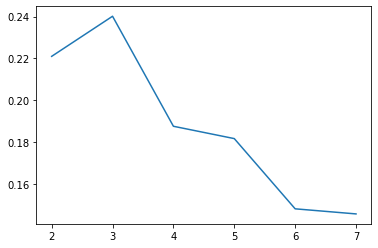

In [23]:
plt.plot(range(2,8), listaSilhouetteScore)

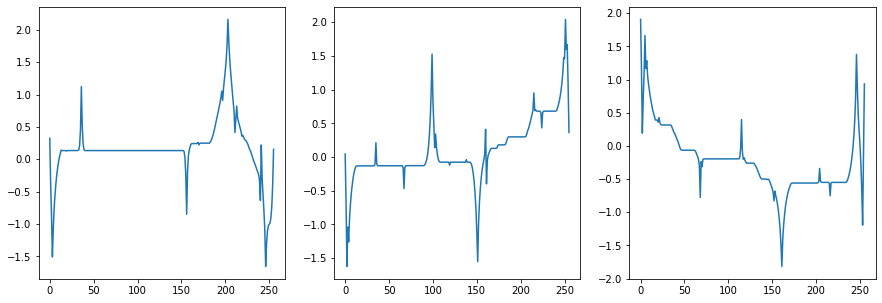

In [25]:
with open(os.path.join("../src/OutDir/",'Ecola-wygladzone-ustandaryzowane.pickle-1627737912.4617949-n_cluster-3-dtw.pickle'), "rb") as file:
        model=pickle.load(file)
plt.gcf().set_size_inches(15,5)
for i in range(3):
    plt.subplot(1,3,i+1)
    #plt.ylim(0.015, 0.035)
    plt.plot(model.cluster_centers_[i].ravel())

In [26]:
etykiety=model.predict(szeregi)

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


### KMeans 

In [27]:
kmeansSilList=[]
for i in range(2,8):
    kmeans=KMeans(i)
    predictKMeans=kmeans.fit_predict(szeregi)
    ocena=silhouette_score(odl, predictKMeans, metric="precomputed")
    kmeansSilList.append(ocena)
kmeansSilList

[0.18721621763698046,
 0.12440917866514015,
 0.10298919951914713,
 0.07332553599738485,
 0.05805194823240096,
 0.042507276112247215]

In [28]:
rozniceSil=np.array(listaSilhouetteScore)-np.array(kmeansSilList)
rozniceSil

array([0.03375, 0.11575, 0.08452, 0.10828, 0.08995, 0.10305])